# <font color='cyan'> Regression multiple avec une seule feature

###  Pour adapter notre modèle linéaire à des problèmes non-linéaires, on va seulement changer les dimensions de X et théta. Le reste de l'algorithme n'a pas besoin d'être changé.

In [3]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

#fonction pour avoir un backfround de figure noir
plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

# 1. Dataset

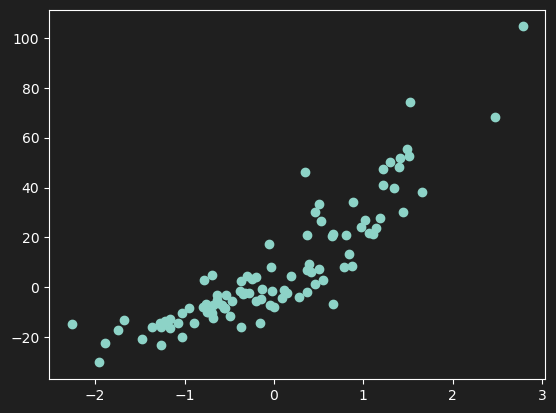

In [52]:
x,y = make_regression(n_samples=100, n_features=1, noise = 10)
y = y + abs(y/2) # permet d'obtenir un modèle non-linéaire simple.
plt.scatter(x,y) # affiche le dataset en 2D

In [54]:
print(x.shape)
# On reshape y car par défaut, y est de dim "100, ". Il faut donc preciser qu'il n'y a qu'une seule colonne.
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)


In [56]:
# On creer notre matrice X avec la fonction hstack qui permet de "coller" deux vecteurs et ainsi de faire une matrice.
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X)) # on modifie X car notre modèle est maintenant d'orde 2
X.shape

(100, 3)

In [58]:
theta = np.random.randn(3,1) #on modifie egalement theta
theta.shape
theta

array([[-0.52765565],
       [ 0.61367793],
       [-1.58802515]])

# 2. Modèle

In [61]:
def model(X,theta):
    return X.dot(theta) # effectu le produit matricielle de X et theta.

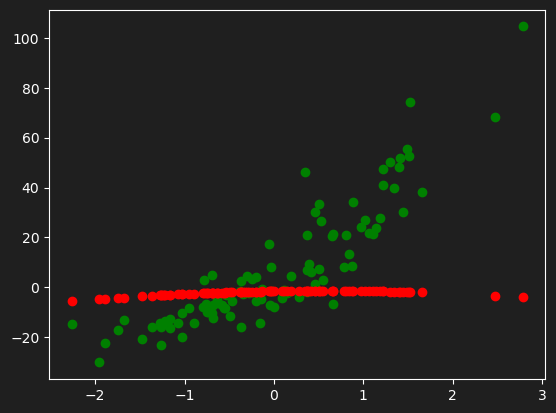

In [63]:
plt.scatter(x,y, c ='g')
plt.scatter(x, model(X,theta), c = 'r') # On affiche notre modèle par rapport à notre dataset.

# 3. Fonction coût

In [66]:
def cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X,theta)- y)**2)

In [68]:
cost_function(X,y,theta) # rappel : on veut que le coût soit le plus proche de zero possible.

322.31881305851874

# 4. Gradient

In [71]:
def grad(X,y,theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta) - y)

# 5. descente de gradient

In [74]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)
    return theta, cost_history

# 6. Resultat de la regression linéaire

In [77]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [79]:
theta_final

array([[ 5.00548005],
       [20.52712629],
       [ 2.47845394]])

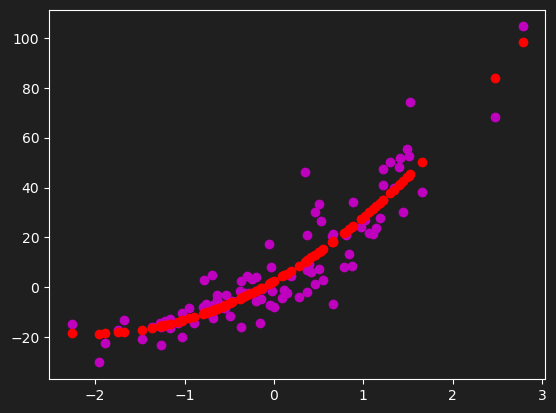

In [81]:
prediction = model(X, theta_final)
plt.scatter(x[:,0],y, c = 'm')
plt.scatter(x[:,0], prediction, c = 'r')

### On remarque que le modèle n'est pas encore très fiable. Soit on augmente le nombre d'itérations, soit on augmente le learning rate pour converger plus rapidement. Attention cependant à ne pas trop l'augmenter.

# 7. Apprentissage de la machine

### On va regarder comment evolue notre model au fil des itération et ainsi savoir le nombre d'itération necessaire pour un valeur du learning_rate donnée

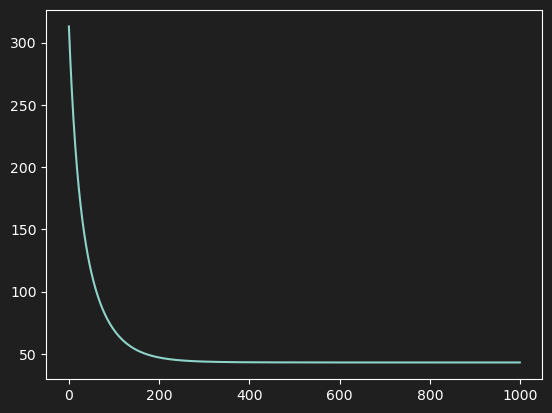

In [86]:
plt.plot(range(1000), cost_history)

# 8. Coefficient de détermination du modèle

### On regarde un indicateur appelé le coefficient de détermination, qui nous permet de savoir si notre modèle est fiable. C'est plus parlant que la fonction coût

In [90]:
def coef_determination(y, prediction):
    u = ((y - prediction)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [92]:
coef_determination(y, prediction)

0.8507454089297861

### Notre coef est compris entre de 0.50 et 0.90 en fonction des datas qui sont aléatoires. Cela est du au bruit qui est assez important ici. Notre modèle n'est donc pas optimal si il y a beaucoup de bruit.